### **TP Final Análisis de Datos:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

## 1 - Introducción:
Este trabajo evaluó y comparó la performance (en un set de datos determinado) de la clasificación de diferentes modelos, como por ejemplo *k-vecinos cercanos*, *árboles de decisón*, etc.

Para ello se usó una base de datos con diferentes atributos asociados a tumores mamarios. A partir de técnicas de procesamiento imagenes utilizando un clasificador inductivo basado en programación lineal, se creó un sistema de alta precisión para el diagnóstico de tumores de mama (Wolberg y otros, 1992).

A partir de muestras tomadas mediante jeringa y con una interfaz interactiva, se inicializaron modelos de contorno activos, conocidos como *snakes*, cerca de los límites de un conjunto de núcleos celulares.

Las *snakes* personalizadas se deforman con la forma exacta de los núcleos. Esto permite un análisis preciso y automatizado del tamaño, la forma y la textura del núcleo. Se calculan diez características para cada núcleo, definiendo su el valor medio, el valor más grande (o peor) y la desviación estándar de cada característica para cada tumor en particular. Por ejemplo, el radio medio se calcula como la media de la distancia del centro de la célula hasta cada punto del perímetro.

El set de Datos utilizado lleva el nombre de *Conjunto de datos Breast Cancer Wisconsin (Diagnostic)* (Wolberg y otros, 1995).

Contiene características/atributos obtenidas a partir de imágenes digitales de células mamarias, como el radio, la textura, perímetro, y otras características. Se lo puede encontrar en el siguiente link:

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importa las librerias nencesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Define la ruta al archivo de datos
directorio_actual = os.getcwd()
directorio_datos = directorio_actual + '/Data/data_sin_procesar.xlsx'

In [6]:
# Carga el DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(directorio_datos, sheet_name='data')

## Análisis de Datos

In [7]:
# Muestra los primeros registros
df.head()

,ID,diagnosis,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radio_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Resumen con estadisticos para cada atributo (sin considerar ID ni objetivo categorico)
df.iloc[:, 2:].describe()

,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radio_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Identificación de tipo de dato

In [12]:
# Muestra los tipos de datos de los atributos
print(f"Cantidad de filas: {df.shape[0]}\n")
print(f"Columnas:\n{df.dtypes}")

Cantidad de filas: 569

Columnas:
ID                           int64
diagnosis                   object
radio_mean                 float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radio_std                  float64
texture_std                float64
perimeter_std              float64
area_std                   float64
smoothness_std             float64
compactness_std            float64
concavity_std              float64
concave_points_std         float64
symmetry_std               float64
fractal_dimension_std      float64
radio_worst                float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst    

In [13]:
dtypes = df.dtypes
inte_columns = dtypes[dtypes == 'int64'].count()
real_columns = dtypes[dtypes == 'float64'].count()
cate_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. campo entero: {inte_columns} \nCant. campo categórico: {cate_columns} \nCant. campo real: {real_columns}")

Cant. campo entero: 1 
Cant. campo categórico: 1 
Cant. campo real: 30


Observaciones: El Data Frame ya tiene los tipos de datos unificados. Las variables reales son todas del tipo 'float64', el ID de registro es del tipo 'int64' y el target es categórico.

### Variables de Entrada

Las características se calculan a partir de una imágenes de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Algunas de las imágenes se pueden encontrar en http://www.cs.wisc.edu/~street/images/

Los atributos categóricos son:

Atributo | Descripción | Unidad
:---: | :---: | :---:
`ID` | Número de registro. | adimensional
`diagnosis` | Clasificación en maligno o benigno. | adimensional           

Los atributos continuos para un determinado tumor son calculados a partir de varias mediciones de una misma variable a partir de su correspondiente imagenes.
Por ende, los siguientes atributos tendrán valor medio, desviación estándar y el peor valor (el que más tiende a un diagnóstico de maligno para ese tumor en particular).

Atributo | Descripción | Unidad
:---: | :---: | :---:
`radio` | Distancia media desde el centro a los puntos en el perímetro. | μm
`texture` | Desviación standard media de la escala de grises de la imagen. | adimensional
`perimeter` | Perímetro medio del tumor. | μm
`area` | Área media del tumor. | μm^2          
`smoothness` | Variación local media de la longitud del radio. | adimensional     
`compactness` | Valor medio de la compactación: perimeter^2 / area - 1.0. | adimensional
`concavity` | Valor medio de la concavidad. | adimensional            
`concave_points` | Valor medio de número de porciones cóncavas del contorno. | adimensional        
`symmetry` | Valor de simetría media. | adimensional            
`fractal_dimension` | Valor medio de "coastline approximation" - 1. | adimensional

In [15]:
def distribuciones_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  # Obtén la lista de nombres de columnas numéricas
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Itera sobre las columnas numéricas y grafica la distribución de cada una
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, edgecolor=None, kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.grid(True)
    plt.show()

In [ ]:
distribuciones_reales(df)

In [17]:
# Graficado de caracteristicas discriminado por M o B
def distribuciones_discriminadas_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada
  discriminando cuando el diagnóstico es "maligno"
  y por otro lado cuando es "benigno".

  :param:
  :df: DataFrame con los atributos.
  """
  # Filtrar registros cuando 'categoria' es 'M'
  df_m = df[df['diagnosis'] == 'M']

  # Filtrar registros cuando 'categoria' es 'B'
  df_b = df[df['diagnosis'] == 'B']

  # Obtener lista de nombres de campos numéricos
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Plotear histogramas para cada campo numérico
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    # Histograma para 'M'
    sns.histplot(df_m[feature], bins=20, edgecolor=None, color='red', label='M', alpha=0.5, kde=True)
    # Histograma para 'B'
    sns.histplot(df_b[feature], bins=20, edgecolor=None, color='green', label='B', alpha=0.5, kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
distribuciones_discriminadas_reales(df)

Pregunta:  - ¿Cómo se distribuyen las características para tumores benignos vs. malignos?. ¿Existen diferencias significativas en las distribuciones de estas características entre los dos tipos de diagnóstico?

Respuesta: Se observó que en el caso benigno la media y desvío estándar de las características son menores que en el caso maligno. En el caso de la media el resultado es esperable dado que tumores con valores medios de radio_worst (o radio_mean) o concave_points_worst (entre otros) mayores tiende a ser un diagnóstico de tumor ,aligno. Además, en todos los casos ambas distribuciones (maligno/beningo) se encuentran separadas (si bien existe zona de superposción) permitiendo definir rangos empíricos de diagnóstico. También se observó que los máximos en el caso maligno son menores que en el caso benigno. En todos los casos cabe recordar que los histogramas presentados son luego de la estandarización de las características.

### Variables de salida

Se observó que la cardinalidad de la variable categórica es baja, ya que presenta solo dos estados posibles: 'M' (maligno) ó 'B' (benigno). Además, los casos malignos representan aproximadamente el 50% de los casos benignos, lo que puso en evidencia que las clases están desbalanceadas. Esto invita a realizar un escalado de las características. 

## Ingeniería de Características

### Faltantes

In [20]:
def datos_faltantes(df):
  """
  Permite conocer la cantidad de datos faltantes de
  cada campo del Data Frame de ingresado.

  :param:
  :df: DataFrame con los atributos.
  """
  campos = df.columns.tolist()
  for campo in campos:
    # Hay registros con datos faltantes?
    print(f"Cantidad de datos faltantes de {campo}: {df[campo].isna().sum()}")

In [21]:
datos_faltantes(df)

Cantidad de datos faltantes de ID: 0
Cantidad de datos faltantes de diagnosis: 0
Cantidad de datos faltantes de radio_mean: 0
Cantidad de datos faltantes de texture_mean: 0
Cantidad de datos faltantes de perimeter_mean: 0
Cantidad de datos faltantes de area_mean: 0
Cantidad de datos faltantes de smoothness_mean: 0
Cantidad de datos faltantes de compactness_mean: 0
Cantidad de datos faltantes de concavity_mean: 0
Cantidad de datos faltantes de concave_points_mean: 0
Cantidad de datos faltantes de symmetry_mean: 0
Cantidad de datos faltantes de fractal_dimension_mean: 0
Cantidad de datos faltantes de radio_std: 0
Cantidad de datos faltantes de texture_std: 0
Cantidad de datos faltantes de perimeter_std: 0
Cantidad de datos faltantes de area_std: 0
Cantidad de datos faltantes de smoothness_std: 0
Cantidad de datos faltantes de compactness_std: 0
Cantidad de datos faltantes de concavity_std: 0
Cantidad de datos faltantes de concave_points_std: 0
Cantidad de datos faltantes de symmetry_std:

In [23]:
# Realiza el mapa de calor de datos faltantes
def mapa_calor_faltantaes(df):
  """
  Genera el mapa de calor para visualizar
  donde se alojan los datos faltantes.

  :param:
  :df: DataFrame con los atributos.
  """
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Mapa de Calor de Datos Faltantes')
  plt.xlabel('Columna')
  plt.ylabel('Registro')
  plt.show()

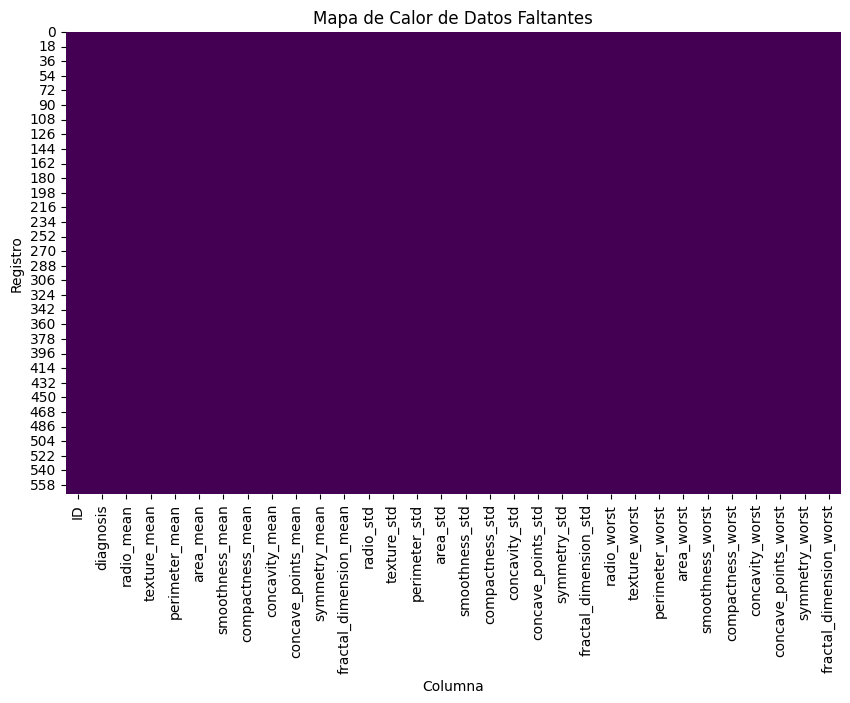

In [24]:
mapa_calor_faltantaes(df)

Se busca si las características reales tienen valores numéricos que se asocian a faltantes, para ello se busca el rango de cada una de ellas.

In [25]:
# Busca el rango de cada caracteristica
rango = df.describe().loc[['min', 'max']]

# Se agrega el indice 'range' y  se completa la fila creada con la diferencia entre 'max' y 'min'.
rango.loc['range'] = rango.loc['max'] - rango.loc['min']

# se presenta el rango de cada campo
rango.head()

,ID,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radio_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
min,8670.0,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,911320502.0,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750
range,911311832.0,21.129,29.57,144.71,2357.5,0.11077,0.32602,0.4268,0.2012,0.198,...,28.11,37.52,200.79,4068.8,0.15143,1.03071,1.252,0.291,0.5073,0.15246


Observaciones: Sabiendo que las variables miden magnitudes físicas positivas, se observó que en todos los casos los valores mínimos y máximos resultan consistentes (por ejemplo no existen valores -99 para indicar faltantes). Por otro lado, se vio que la magnitud del rango entre las diferentes características varía, lo que invita a realizar un escalamiento de las mismas.

Además, se busca si existe alguna observación que haya sido completada con algún caracter especial ('-' por ejemplo) para indicar faltantes.

In [26]:
# Verifica si existe alguna fila con todos los valores como '-'
hay_fila_con_solo_guiones = df.apply(lambda row: all(cell == '-' for cell in row), axis=1).any()

print(f"¿Existe alguna observación completada solo con '-': {hay_fila_con_solo_guiones}")

¿Existe alguna observación completada solo con '-': False


Observaciones: No existen valores faltantes en este dataset. No obstante dado que las variables miden magnitudes físicas de un tumor, es posible que no haya una independencia absoluta entre las características. Por ejemplo, si el radio del tumor es significativo favoreciendo que sea maligno, es probable que la cantidad de puntos convcavos también sea elevado.

Frente a esto, si fuese el caso de faltantes, podrían aplicarse técnicas de reemplzado multivariada. Por ejemplo la imputación por vecinos cercanos o MICE (Multiple imputation by chained equations). Cabe mencionar que a la hora de elegir una técnica de reemplazo de faltantes es necesario identificar el si el motivo de la ausencia de datos se debe a motivos aleatorios o si tiene una explicación definida.

### Duplicados

In [27]:
# Verifica si hay registros duplicados en todo el DataFrame
def duplicados(df):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados.

  :param:
  :df: DataFrame con los atributos.
  """
  hay_duplicados = df.duplicated().any()

  if hay_duplicados:
      print("El DataFrame tiene registros duplicados.")
  else:
      print("El DataFrame no tiene registros duplicados.")

In [28]:
duplicados(df)

El DataFrame no tiene registros duplicados.


### Correlación

Pregunta: ¿Qué características entre las proporcionadas tienen mayor correlación entre si?.

Se detectan 3 diagonales con valores cercanos (o iguales) a uno en el mapa anterior.

La principal, que se extiende de la esquina superior izquierda a la esquina inferior derecha asociada a que se realiza la correlación entre una característica y si misma.

Luego, se detectan dos diagonales abajo a la izquierda y arriba a la derecha del mapa. Esto está asociado la elevada correlación que hay entre el valor medio de una característica y el valor máximo de la misma. Con esto se pone en evidencia la dependencia que existe entre etas características.

Para trabajar con un conjunto de características independientes,parecería conveniente eliminar los datos relacionados con los *worst values* (valores peores o valores máximos) de los atributos, para así mejorar el rendimiento del modelo (Guyon y Elisseeff, 2003) y quedarse con los valores medios (mean).

### Selección Backward de características

In [29]:
# Importa las clases necesarias
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
# Divide en variables independientes (X) y dependientes (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [31]:
# Establece el modelo de base
model = LogisticRegression(solver='liblinear')

In [32]:
# Aplica RFE para seleccion de caracteristicas (implementa el método wrapper backward eliminando las características menos importantes)
rfe = RFE(model, n_features_to_select=5)  # Ajustar el número de características en 5
fit = rfe.fit(X, y)

In [33]:
# Evalua las caracteristicas seleccionadas
selected_features = X.columns[fit.support_]
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['radio_mean', 'concavity_mean', 'radio_worst', 'concavity_worst', 'concave_points_worst']


In [34]:
# Para ver el ranking de todas las características
ranking = fit.ranking_
print(f"Feature Ranking: {dict(zip(X.columns, ranking))}")

Feature Ranking: {'ID': 26, 'radio_mean': 1, 'texture_mean': 11, 'perimeter_mean': 13, 'area_mean': 25, 'smoothness_mean': 14, 'compactness_mean': 27, 'concavity_mean': 1, 'concave_points_mean': 2, 'symmetry_mean': 8, 'fractal_dimension_mean': 22, 'radio_std': 4, 'texture_std': 9, 'perimeter_std': 3, 'area_std': 7, 'smoothness_std': 23, 'compactness_std': 15, 'concavity_std': 16, 'concave_points_std': 20, 'symmetry_std': 19, 'fractal_dimension_std': 24, 'radio_worst': 1, 'texture_worst': 10, 'perimeter_worst': 5, 'area_worst': 21, 'smoothness_worst': 17, 'compactness_worst': 6, 'concavity_worst': 1, 'concave_points_worst': 1, 'symmetry_worst': 18, 'fractal_dimension_worst': 12}


In [35]:
# Eliminacion de campos del dataframe
def reduccion(df, lista):
  """
  Elimina las columnas, dentro del rango
  indicado, del dataframe de entrada.

  :param:
  :df: DataFrame con los atributos.
  :lista: Columna a partir de la cual eliminar.
  """
  # Crear un nuevo DataFrame solo con las columnas seleccionadas
  df_red = df[lista]
  
  return df_red

In [36]:
df_red =  reduccion(df, ['diagnosis', 'radio_mean', 'concavity_mean', 'radio_worst', 'concavity_worst', 'concave_points_worst'])

### Modelos

Originalmente la variable objetivo 'diagnosis' es categórica dado que puede tomar valors 'M' (maligno) o 'B' (benigno). Esto permite encarar la aplicación de algoritmos de clasificación. No obstante, la creación de la variable 'dummy' 'diagnosis_M' permite aplicar algoritmos de regresión dado la naturaleza numérica del objetivo creado.

A partir de lo anterior, se decidió aplicar y comparar los resultados de los siguientes modelos:

Regresión Logística.

SVC.

Árbol de Clasificación.

Perceptrón.

El atributo (objetivo) categórico es:

Atributo |
:---: | 
`diagnosis`|         

Luego del análisis de datos y de la ingeniería de características, se obtuvo que las
características relevantes son :

Atributo |
:---: |
`radio_mean` |
`radio_worst` |    
`concavity_mean` |     
`concavity_worst`|
`concave_points_worst`|


In [38]:
# Importa split de datos, busqueda de hiper-parametros, estandarizacion y metricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [39]:
# Separa las caracteristicas y el objetivo
X = df.loc[:, ['radio_mean', 'radio_worst', 'concavity_mean', 'concavity_worst', 'concave_points_worst']].values
y = df.loc[:, "diagnosis"].values

In [40]:
# Divide los datos en conjunto de entrenamiento y prueba 80/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regresión Logística

Mejores hiperparámetros: LogisticRegression(C=100, max_iter=1000)
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score: 0.9767441860465116


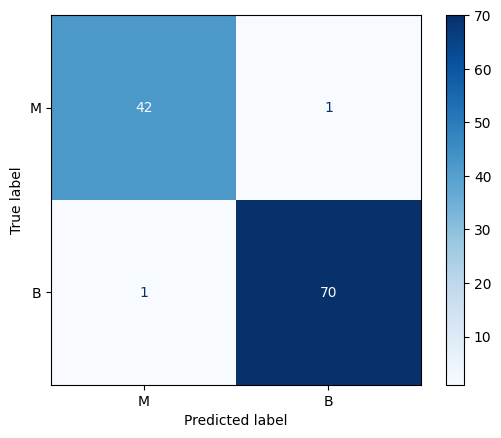

In [41]:
# Importa el algoritmo
from sklearn.linear_model import LogisticRegression

# Define la grilla de hiper-parametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'solver': ['liblinear', 'lbfgs']  # Solvers para la optimización
}

# Asigna el modelo
model = LogisticRegression(max_iter=1000)

# Configura la busqueda de hiper-parametros por grilla con validacion cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Entrena el modelo
grid_search.fit(X_train, y_train)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Muestra metricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

SVM

Mejores hiperparámetros: SVC(C=0.1, gamma='auto', kernel='poly')
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 Score: 0.9767441860465116


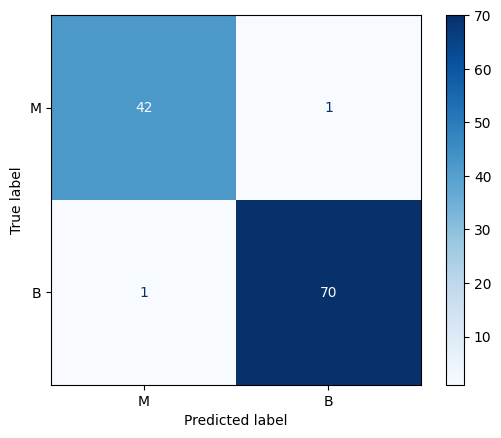

In [42]:
# Importa el algoritmo
from sklearn.svm import SVC

# Define la grilla de hiperparametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipos de núcleos
    'gamma': ['scale', 'auto']  # Parámetro del núcleo
}

# Support Vector Classifier
model = SVC()

# Define la grilla de hiper-parametros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') 

# Entrena el modelo
grid_search.fit(X_train,y_train)

# Obtiene los mejores hiper-parametros
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Muestra metricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Árbol de Clasificación

Mejores hiperparámetros: DecisionTreeClassifier(max_depth=30, min_samples_leaf=4)
Precision: 0.9285714285714286
Recall: 0.9069767441860465
F1 Score: 0.9176470588235294


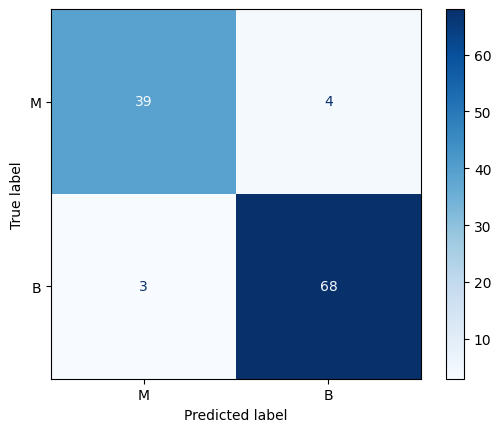

In [43]:
# Importa el algoritmo
from sklearn.tree import DecisionTreeClassifier

# Crea el modelo de arbol de clasificacion
model = DecisionTreeClassifier()

# Define la grilla de hiper-parametros
param_grid = {
    'criterion': ['gini', 'entropy'],  # Funcion para medir la calidad de una division
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima del arbol
    'min_samples_split': [2, 5, 10],   # Numero minimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Numero minimo de muestras requeridas para estar en una hoja
}

# Configura GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Entrena el modelo
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiper-parametros
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Muestra metricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Perceptrón

Mejores hiperparámetros: Perceptron(eta0=0.1, penalty='elasticnet')
Precision: 0.5584415584415584
Recall: 1.0
F1 Score: 0.7166666666666667


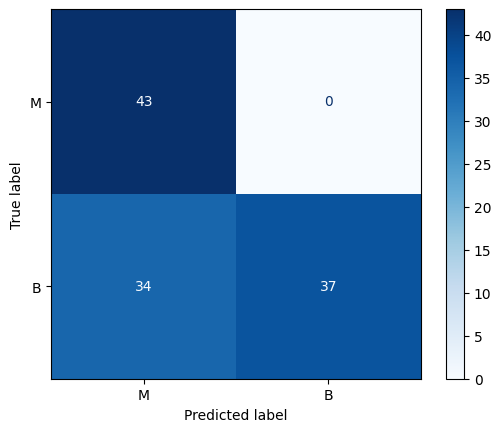

In [44]:
# Importa el algoritmo
from sklearn.linear_model import Perceptron

# Crea el modelo de perceptron
model = Perceptron()

# Define la grilla de hiper-parametros
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],  # Tipo de regularizacion
    'alpha': [0.0001, 0.001, 0.01],  # Parametro de regularizacion
    'max_iter': [1000, 5000, 10000],  # Numero maximo de iteraciones
    'eta0': [1.0, 0.1, 0.01]  # Tasa de aprendizaje inicial
}

# Realiza la busqueda de hiperparametros con GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Entrena el modelo
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiperparametros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_model)

# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Muestra metricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Se realizó una tabla comparativa de los resultados de las métricas sobre el conjunto datos de prueba:

| Modelo                 | Presición | Recall | F1-Score |
|------------------------|-----------|--------|----------|
| Regresión Logistica    |    0.90   |  0.97  |   0.93   |
| SVC                    |    0.90   |  0.94  |   0.92   |
| Árbol de Clasificación |    0.92   |  0.92  |   0.92   |
| Perceptrón             |    0.59   |  0.92  |   0.72   |

Conclusiones: En general las métricas arrojan una buena performance de los cuatro modelos. El que menos performance muestra es el perceptrón. No obstante, la mejor precisión (0.97) se obtiene con el conjunto completo de características como se muestra en https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic utilizando Random Forest con un valor de 0.98 de valor medio de precisión:

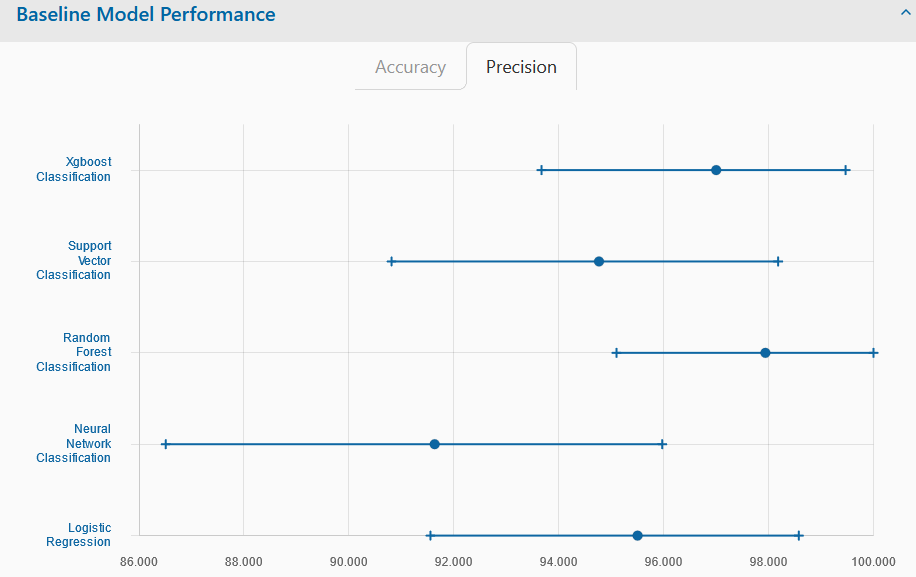

Pregunta: Cómo se comparan las características de los tumores benignos más cercanos a la frontera de clasificación con los tumores malignos?. Es decir, analizar los casos que son más difíciles de clasificar, aquellos que están cerca de la frontera de decisión de un clasificador. 

In [45]:
# Prepara los datos
X = df[['radio_mean', 'concavity_mean', 'radio_worst', 'concavity_worst', 'concave_points_worst']]
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Entrena un modelo de regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# Obtiene las probabilidades de clasificacion para las muestras de prueba
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 'M'

In [48]:
# Determina la distancia de las probabilidades al umbral 0.5
distance_to_boundary = np.abs(probabilities - 0.5)

In [49]:
# Crea un DataFrame para analizar los casos cercanos a la frontera
results = X_test.copy()
results['probability_M'] = probabilities
results['true_label'] = y_test.values
results['distance_to_boundary'] = distance_to_boundary
results['predicted_label'] = model.predict(X_test)

In [50]:
# Filtra los tumores benignos y malignos mas cercanos a la frontera
benign_near_boundary = results[(results['true_label'] == 0) & (results['distance_to_boundary'] < 0.1)]
malignant_near_boundary = results[(results['true_label'] == 1) & (results['distance_to_boundary'] < 0.1)]

In [56]:
!pip install tabulate


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from tabulate import tabulate

In [58]:
# Imprime la tabla en formato legible
print(tabulate(benign_near_boundary.describe(), headers='keys', tablefmt='pretty', showindex=True))

+-------+------------+----------------+-------------+-----------------+----------------------+--------------------+------------+----------------------+-----------------+
|       | radio_mean | concavity_mean | radio_worst | concavity_worst | concave_points_worst |   probability_M    | true_label | distance_to_boundary | predicted_label |
+-------+------------+----------------+-------------+-----------------+----------------------+--------------------+------------+----------------------+-----------------+
| count |    1.0     |      1.0       |     1.0     |       1.0       |         1.0          |        1.0         |    1.0     |         1.0          |       1.0       |
| mean  |   13.34    |     0.1169     |    15.53    |     0.4858      |        0.1708        | 0.4761038946082665 |    0.0     | 0.02389610539173348  |       0.0       |
|  std  |    nan     |      nan       |     nan     |       nan       |         nan          |        nan         |    nan     |         nan          

In [59]:
# Imprime la tabla en formato legible
print(tabulate(malignant_near_boundary.describe(), headers='keys', tablefmt='pretty', showindex=True))

+-------+--------------------+---------------------+--------------------+---------------------+----------------------+---------------------+------------+----------------------+--------------------+
|       |     radio_mean     |   concavity_mean    |    radio_worst     |   concavity_worst   | concave_points_worst |    probability_M    | true_label | distance_to_boundary |  predicted_label   |
+-------+--------------------+---------------------+--------------------+---------------------+----------------------+---------------------+------------+----------------------+--------------------+
| count |        3.0         |         3.0         |        3.0         |         3.0         |         3.0          |         3.0         |    3.0     |         3.0          |        3.0         |
| mean  | 14.566666666666668 |       0.12803       |       16.55        | 0.38609999999999994 | 0.15596666666666667  | 0.5312991857982502  |    1.0     | 0.05708211103616617  | 0.6666666666666666 |
|  std  | 

Variación porcentual de estadísticos al pasar de un diagnóstico benigno a maligno:

|estadístico|radio_mean|concavity_mean|radio_worst|concavity_worst|concave_points_worst|
|-----------|----------|--------------|-----------|---------------|--------------------|
|mean       |  +9.2    |    +9.5      |   +6.7    |     -20.5     |      -8.7          |
|min        |  +1.1    |    -16.3     |    0.0    |     -34.9     |      -38.7         |
|50%        |  +4.7    |    -9.1      |   +5.5    |     -31.2     |      -20.0         |
|max        |  +22.0   |    +54.9     |   +14.2   |     +3.5      |      +32.2         |

Observaciones: 

A partir de estos resultados, parece que los extremos presentan las mayores variaciones. En el caso de extrmos máximos, las características muestran los mayores aumentos porcentuales en todas las características.

Por otro lado, los extremos mínimos de 'concavity_mean', 'concavity_worst' y 'concave_points_worst' muestran una disminución porcentual significativa.

Por último, en los casos de 'concavity_worst' y 'concave_points_worst' la disminución en la mediana también parece ser un estadístico que ayude a disernir el diagnóstico en los casos de frontera.

Pregunta: Cómo varía la precisión del modelo con diferentes tamaños de muestra?. Es decir, analizar la curva de aprendizaje para ver cómo el tamaño del conjunto de entrenamiento afecta la precisión del modelo.

In [61]:
# Importa las clases necesarias
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, learning_curve

In [62]:
# Convierte el objetivo a valores numericos
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [63]:
# Genera la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=1000), X_train, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

In [67]:
# Calcula las medias y desviaciones estandar para las precisiones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

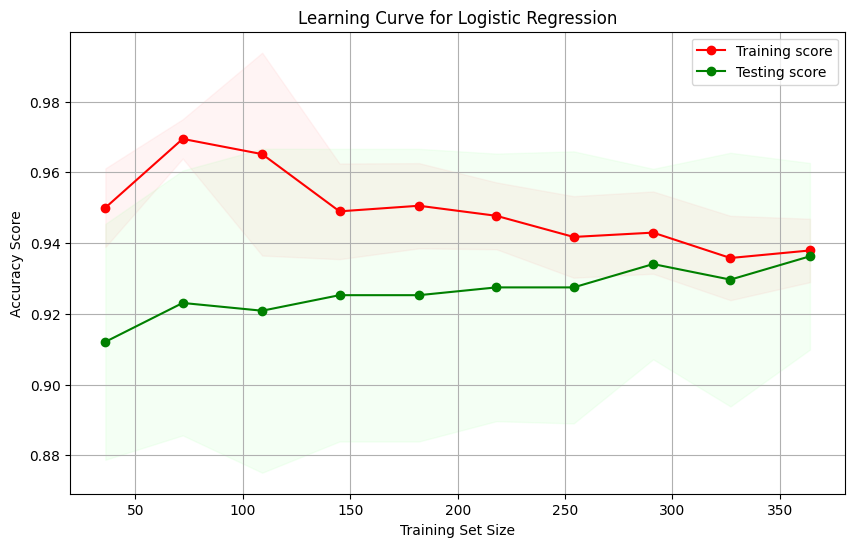

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#FF9999", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#99FF99", alpha=0.1)

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Observaciones: Este gráfico muestra como la precisión del modelo varía según el tamaño del conjunto de entrenamiento. Aquí algunos puntos clave que podrías observar:

En tamaños pequeños de entrenamiento, como la precisión media de entrenamiento es alta pero la de evaluación es baja, el modelo podría estar sobreajustando para esos casos.
Se observó cierta convergencia, es decir las curvas medias de entrenamiento y evaluación se acercan a medida que aumenta el tamaño del conjunto de entrenamiento, el modelo generalización.

Por otro lado, hay una disminución progresiva del desvío estándar de la precisión del conjunto de prueba, esto se debe a que cada una de las evaluaciones en los folds de la validación cruzada ve performance diferentes que al aumentar el tamaño de la muestra an convergiendo. Esto apoya la idea de que el modelo adopta la capacidad de generalizar independientemente del conjunto de datos.

Bibliografía:

Isabelle Guyon, Andre Elisseeff (2003). An introduction to variable and feature selection. Journal of Machine Learning Research 3 (2003) 1157-1182


Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.


W. Street, W. Wolberg, O. Mangasarian. (1992)
Nuclear feature extraction for breast tumor diagnosis.
Published in Electronic imaging.